In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler   # use StandardScaler instead of MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# ---------------- Load Data ----------------
df = pd.read_csv("hourly_mean.csv")
print("Data shape:", df.shape)

# Remove Day column (keep only 24 hourly values)
data = df.iloc[:, 1:].values   # shape (D, 24)
D = data.shape[0]

# ---------------- Scaling ----------------
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# ---------------- Create Sequences ----------------
lookback = 10   # number of past days to use
X, y = [], []
for i in range(lookback, D):
    X.append(data_scaled[i-lookback:i])   # past lookback days
    y.append(data_scaled[i])              # next day target

X = np.array(X)   # shape (samples, lookback, 24)
y = np.array(y)   # shape (samples, 24)

print("X shape:", X.shape, "y shape:", y.shape)

# ---------------- Train/Test Split ----------------
split_idx = int(0.7 * len(X))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# ---------------- Build Improved LSTM Model ----------------
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(lookback, 24)),
    Dropout(0.2),
    LSTM(64),
    Dense(64, activation="relu"),
    Dense(24)   # predict 24 hours
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="mse")
model.summary()

# ---------------- Train ----------------
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=32,
    validation_split=0.1,
    callbacks=[es],
    verbose=1
)

# ---------------- Evaluate ----------------
y_pred = model.predict(X_test)

# Inverse transform to original scale
y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred)

# Calculate Errors
mse = mean_squared_error(y_test_inv.flatten(), y_pred_inv.flatten())
mae = mean_absolute_error(y_test_inv.flatten(), y_pred_inv.flatten())
rmse = np.sqrt(mse)

print(f"Test MSE: {mse:.2f}")
print(f"Test RMSE: {rmse:.2f}")
print(f"Test MAE: {mae:.2f}")

Data shape: (1000, 25)
X shape: (990, 10, 24) y shape: (990, 24)


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_69"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_94 (LSTM)                  │ (None, 10, 128)        │        78,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_95 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_94 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_95 (Dense)                │ (None, 24)             │         1,560 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 133,464 (521.34 KB)

 Trainable params: 133,464 (521.34 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0657 - val_loss: 0.0302
Epoch 2/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0272 - val_loss: 0.0283
Epoch 3/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0261 - val_loss: 0.0272
Epoch 4/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0266 - val_loss: 0.0302
Epoch 5/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0260 - val_loss: 0.0317
Epoch 6/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0261 - val_loss: 0.0266
Epoch 7/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0242 - val_loss: 0.0268
Epoch 8/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0234 - val_loss: 0.0256
Epoch 9/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0204 - val_loss: 0.0160
Epoch 10/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0148 - val_loss: 0.0099
Epoch 11/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0132 - val_loss: 0.0097
Epoch 12/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

In [16]:
from sklearn.metrics import mean_absolute_percentage_error, r2_score

# MAPE
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv) * 100
accuracy = 100 - mape

# R^2
r2 = r2_score(y_test_inv, y_pred_inv)

print(f"MAPE: {mape:.2f}%")
print(f"Accuracy (100-MAPE): {accuracy:.2f}%")
print(f"R² Score: {r2:.3f}")


MAPE: 11.85%
Accuracy (100-MAPE): 88.15%
R² Score: 0.667



Training with lookback = 1 days


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Lookback 1 → MSE: 545.65

Training with lookback = 2 days


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Lookback 2 → MSE: 366.86

Training with lookback = 3 days


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Lookback 3 → MSE: 344.90

Training with lookback = 4 days


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Lookback 4 → MSE: 304.37

Training with lookback = 5 days


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Lookback 5 → MSE: 245.40

Training with lookback = 6 days


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Lookback 6 → MSE: 225.34

Training with lookback = 7 days


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Lookback 7 → MSE: 220.79

Training with lookback = 8 days


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Lookback 8 → MSE: 246.27

Training with lookback = 9 days


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Lookback 9 → MSE: 245.51

Training with lookback = 10 days


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Lookback 10 → MSE: 211.13

Training with lookback = 11 days


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Lookback 11 → MSE: 214.55

Training with lookback = 12 days


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Lookback 12 → MSE: 225.75

Training with lookback = 13 days


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Lookback 13 → MSE: 212.54

Training with lookback = 14 days


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Lookback 14 → MSE: 202.71

Training with lookback = 15 days


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Lookback 15 → MSE: 205.46

Training with lookback = 16 days


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Lookback 16 → MSE: 331.59

Training with lookback = 17 days


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Lookback 17 → MSE: 200.02

Training with lookback = 18 days


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Lookback 18 → MSE: 211.50

Training with lookback = 19 days


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Lookback 19 → MSE: 213.91

Training with lookback = 20 days


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Lookback 20 → MSE: 231.49


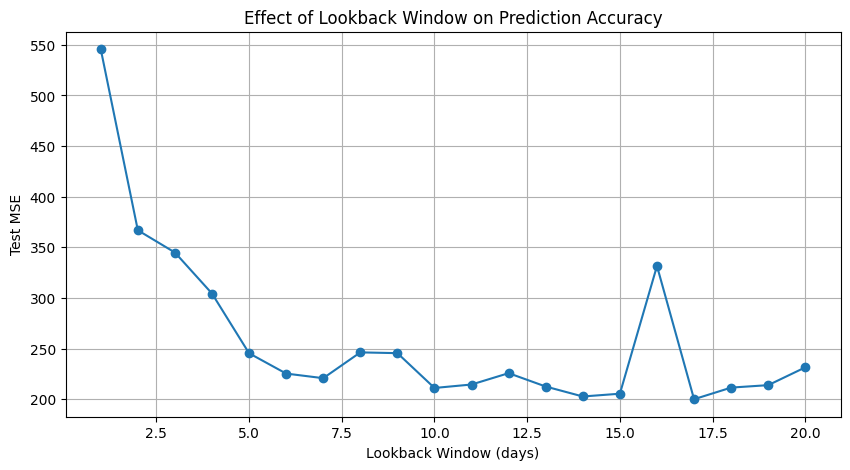

In [11]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# ---------------- Load Data ----------------
df = pd.read_csv("hourly_mean.csv")
data = df.iloc[:, 1:].values   # shape (D, 24)
D = data.shape[0]

# ---------------- Scaling ----------------
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# ---------------- Function: Build sequences ----------------
def create_sequences(data, lookback):
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data[i-lookback:i])   # past lookback days
        y.append(data[i])              # next day
    return np.array(X), np.array(y)

# ---------------- Function: Build LSTM Model ----------------
def build_model(lookback):
    model = Sequential([
        LSTM(64, activation="tanh", input_shape=(lookback, 24)),
        Dense(24)
    ])
    model.compile(optimizer="adam", loss="mse")
    return model

# ---------------- Loop over lookbacks ----------------
mse_list = []
lookbacks = range(1, 21)

for lb in lookbacks:
    print(f"\nTraining with lookback = {lb} days")

    X, y = create_sequences(data_scaled, lb)

    # Train/test split (70%/30%)
    split_idx = int(0.7 * len(X))
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]

    # Build model
    model = build_model(lb)

    # Train briefly (to save time)
    model.fit(X_train, y_train,
              epochs=15, batch_size=16,
              verbose=0)

    # Predict
    y_pred = model.predict(X_test, verbose=0)

    # Inverse scale
    y_test_inv = scaler.inverse_transform(y_test)
    y_pred_inv = scaler.inverse_transform(y_pred)

    # Compute MSE
    mse = mean_squared_error(y_test_inv.flatten(), y_pred_inv.flatten())
    mse_list.append(mse)
    print(f"Lookback {lb} → MSE: {mse:.2f}")

# ---------------- Plot ----------------
plt.figure(figsize=(10,5))
plt.plot(lookbacks, mse_list, marker='o')
plt.xlabel("Lookback Window (days)")
plt.ylabel("Test MSE")
plt.title("Effect of Lookback Window on Prediction Accuracy")
plt.grid(True)
plt.show()


Data shape: (1000, 25)
Training with lookback=1...


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training with lookback=2...


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training with lookback=3...


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training with lookback=4...


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training with lookback=5...


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training with lookback=6...


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training with lookback=7...


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training with lookback=8...


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training with lookback=9...


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training with lookback=10...


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training with lookback=11...


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training with lookback=12...


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training with lookback=13...


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training with lookback=14...


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training with lookback=15...


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training with lookback=16...


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training with lookback=17...


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training with lookback=18...


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training with lookback=19...


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training with lookback=20...


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


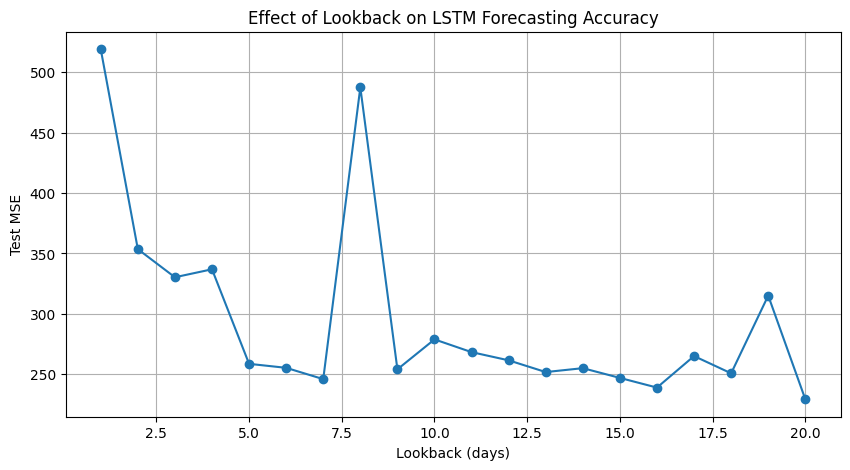

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# ---------------- Load Data ----------------
df = pd.read_csv("hourly_mean.csv")
print("Data shape:", df.shape)

# Remove Day column (keep only 24 hourly values)
data = df.iloc[:, 1:].values   # shape (D, 24)
D = data.shape[0]

# ---------------- Scaling ----------------
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# ---------------- Function to prepare dataset ----------------
def create_sequences(data_scaled, lookback):
    X, y = [], []
    for i in range(lookback, len(data_scaled)):
        X.append(data_scaled[i-lookback:i])
        y.append(data_scaled[i])
    return np.array(X), np.array(y)

# ---------------- Sweep Lookback Values ----------------
mse_scores = []
lookbacks = range(1, 21)

for lookback in lookbacks:
    print(f"Training with lookback={lookback}...")

    # prepare data
    X, y = create_sequences(data_scaled, lookback)
    split_idx = int(0.7 * len(X))
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]

    # build model
    model = Sequential([
        LSTM(128, return_sequences=True, input_shape=(lookback, 24)),
        Dropout(0.2),
        LSTM(64),
        Dense(64, activation="relu"),
        Dense(24)
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="mse")

    # train (use fewer epochs for speed)
    es = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
    model.fit(X_train, y_train, epochs=50, batch_size=32,
              validation_split=0.1, verbose=0, callbacks=[es])

    # predict
    y_pred = model.predict(X_test, verbose=0)

    # inverse transform
    y_test_inv = scaler.inverse_transform(y_test)
    y_pred_inv = scaler.inverse_transform(y_pred)

    # MSE
    mse = mean_squared_error(y_test_inv.flatten(), y_pred_inv.flatten())
    mse_scores.append(mse)

# ---------------- Plot ----------------
plt.figure(figsize=(10,5))
plt.plot(lookbacks, mse_scores, marker="o")
plt.xlabel("Lookback (days)")
plt.ylabel("Test MSE")
plt.title("Effect of Lookback on LSTM Forecasting Accuracy")
plt.grid(True)
plt.show()
